In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import os

In [4]:
def load_model_csvs(model_folder):
    dfs = []
    files = sorted(glob.glob(f"{model_folder}/*.csv"))

    for f in files:
        try:
            with open(f, 'r') as file:
                lines = file.readlines()
                data_lines = [line for line in lines if not line.startswith("#")] # lines that dont include #
                
            csv_data = StringIO("".join(data_lines))
            df = pd.read_csv(csv_data)

            dfs.append(df)
        except Exception as e:
            print(f"unable to open {f}: {e}")

    return pd.concat(dfs, ignore_index=True)

df = load_model_csvs("model1")
print(df.head())
print("--------------------------------------------------")
rf = load_model_csvs("model2")
print(rf.head())
print("--------------------------------------------------")
gf = load_model_csvs("model3")
print(gf.head())

      lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  divergent__  \
0 -11938.6       0.742568     0.11421            5            31            0   
1 -11821.5       0.923137     0.11421            5            31            0   
2 -11818.8       0.908686     0.11421            5            31            0   
3 -11891.4       0.654086     0.11421            5            31            0   
4 -11795.7       0.992854     0.11421            5            31            0   

   energy__   skill.1   skill.2   skill.3  ...  pred_results.15427  \
0   18555.1 -0.887603 -2.644650  1.646720  ...                   0   
1   18567.0 -1.843520 -1.427940  0.261528  ...                   1   
2   18433.2  1.664960  0.185579  1.569050  ...                   0   
3   18476.8 -3.617270 -1.191210  0.723194  ...                   0   
4   18411.4 -3.148130 -1.304340  0.131421  ...                   0   

   pred_results.15428  pred_results.15429  pred_results.15430  \
0                   1      

In [5]:
def plot_skill_evolution(df, player_id):
    import matplotlib.ticker as ticker
    
    skill_cols = [col for col in df.columns if f"skill.{player_id}" in col or f"skill_raw.{player_id}" in col]
    
    if not skill_cols:
        print(f"No skill estimates found for player {player_id}")
        return

    skill_samples = df[skill_cols[0]]
    time_points = np.arange(len(skill_samples))

    plt.figure(figsize=(10, 5))
    plt.plot(time_points, skill_samples, label=f'Player {player_id}', linewidth=2)

    plt.title(f"Skill Estimate Over Time – Player {player_id}")
    plt.xlabel("Match Index", fontsize=12)
    plt.ylabel("Estimated Skill", fontsize=12)
    plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(loc="best", fontsize=10)
    plt.tight_layout()

    plt.show()

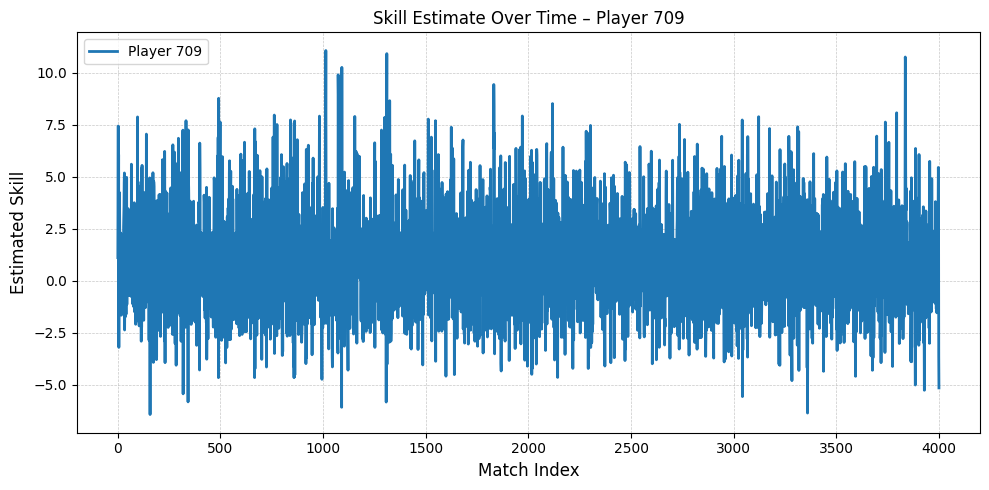

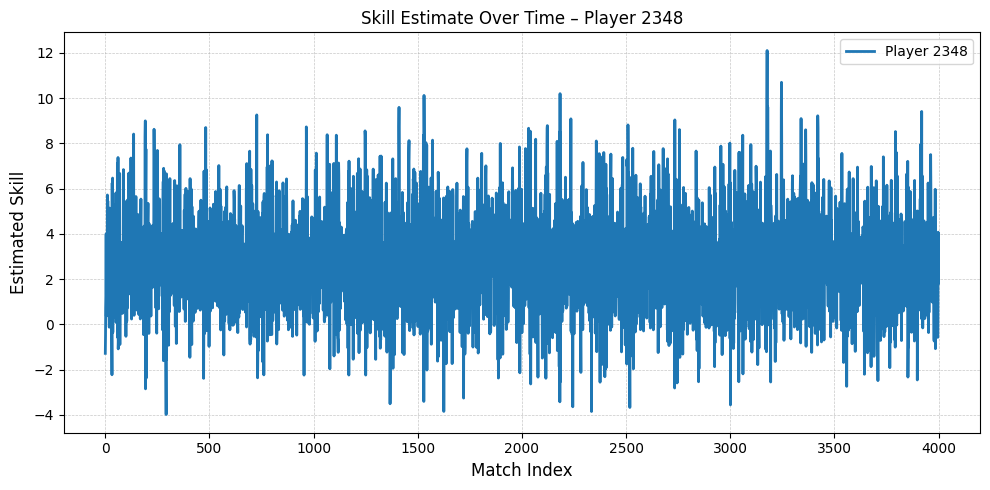

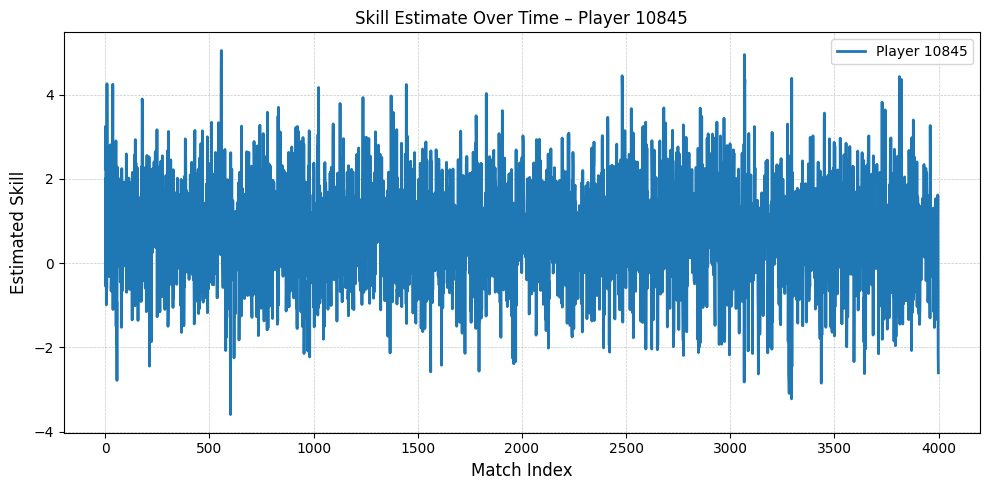

In [6]:
for pid in [709, 2348, 10845]:
    plot_skill_evolution(df, pid)